<a href="https://colab.research.google.com/github/afhabibieee/Statistical_Thinking_Part_1/blob/main/Statistical_Thinking_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Graphical exploratory data analysis

Iris Dataset

In [3]:
# Load iris dataset

iris = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/Iris.csv', index_col=0)

In [4]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Subsetting iris database based on name of species respectively

setosa = iris[iris['Species']=='Iris-setosa']
versicolor = iris[iris['Species']=='Iris-versicolor']
virginica = iris[iris['Species']=='Iris-virginica']

# taking one of the features, is petal length

set_petal_length = setosa['PetalLengthCm']
ver_petal_length = versicolor['PetalLengthCm']
virg_petal_length = virginica['PetalLengthCm']

In [6]:
# plotting the histogram

def hist_plot(data, n_bins, *labelxy):
  '''receive an array, the number of bins and label
  as well as plotting them to the histogram'''
  sns.set()
  _ = plt.hist(data, bins=n_bins)
  _ = plt.xlabel(labelxy[0])
  _ = plt.ylabel(labelxy[1])
  plt.show()
  plt.clf()

Untuk ukuran bins bisa berbeda-beda, https://numpy.org/devdocs/reference/generated/numpy.histogram_bin_edges.html.

Concern-nya di masalah ukuran bins yang berbeda, maka penarikan kesimpulan juga berbeda

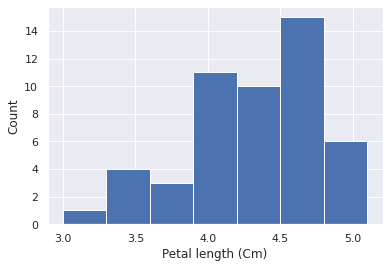

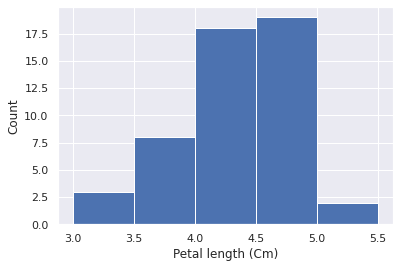

<Figure size 432x288 with 0 Axes>

In [7]:
hist_plot(ver_petal_length, 'fd', 'Petal length (Cm)', 'Count')
hist_plot(ver_petal_length, [3, 3.5, 4, 4.5, 5, 5.5],
          'Petal length (Cm)', 'Count')

---
Alternatif dari masalah variasi jumlah bins pada Histogram adalah menggunakan Bee swarm plot

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[]

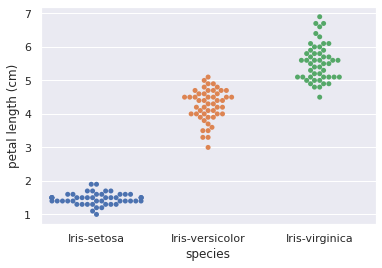

In [8]:
# Plotting the Bee swarm plot

_ = sns.swarmplot(x='Species', y='PetalLengthCm', data=iris)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
plt.plot()

Permasalah lain dari plot ini kalau jumlah data pada tiap species banyak. nantinya tepi/edges tiap species overlapping, jadinya obfuscated dari summaries of data.

---
Alternatif lain dari bee swarm plot adalah ECDF. penarikan kesimpulan juga sedikit berbeda.

In [9]:
# Empirical cumulative distribution function / ECDF

def ecdf(data):
  n = len(data)
  x = np.sort(data)
  y = np.arange(1, n+1) / n
  return x, y

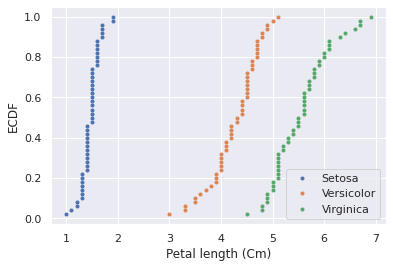

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot ecdf from petal length each species

x_set, y_set = ecdf(set_petal_length)
x_ver, y_ver = ecdf(ver_petal_length)
x_virg, y_virg = ecdf(virg_petal_length)

sns.set()
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_ver, y_ver, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')
_ = plt.xlabel('Petal length (Cm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Setosa', 'Versicolor', 'Virginica'), loc='best')
plt.show()
plt.clf()

Misalnya 80% dari iris setosa memiliki panjang petal kurang dari 6 cm. atau bahasanya, 80% dari panjang petal pada iris setosa kurang dari 6 cm

---
Swing state dataset

In [11]:
# Load dataset 2008 swing states that contain three satates,
# which are Pennsylvania, Ohio and Florida

swing_states = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/2008_swing_states.csv')

In [12]:
swing_states.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [13]:
# subsetting dem_share array that i choose,
# which are persentage of votes for Democrate Party / Obama

dem_share = swing_states['dem_share']

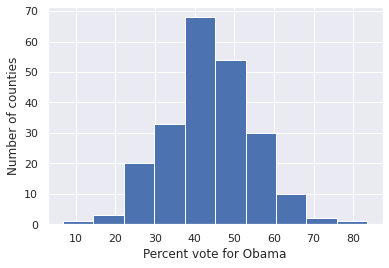

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the histogram

hist_plot(dem_share, 10, 'Percent vote for Obama', 'Number of counties')

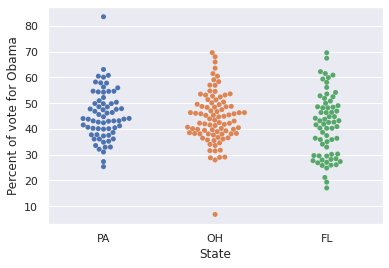

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the Bee swarm plot

_ = sns.swarmplot(x='state', y='dem_share', data=swing_states)
_ = plt.xlabel('State')
_ = plt.ylabel('Percent of vote for Obama')
plt.show()
plt.clf()

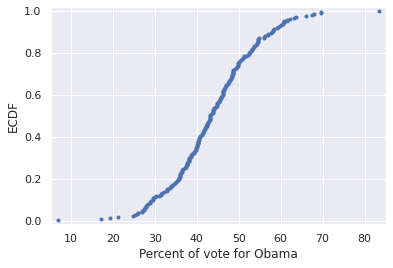

<Figure size 432x288 with 0 Axes>

In [16]:
# Plotting the ecdf from the swing state entirely

x, y = ecdf(dem_share)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()
plt.clf()

In [17]:
np.mean(y)

0.5022522522522522

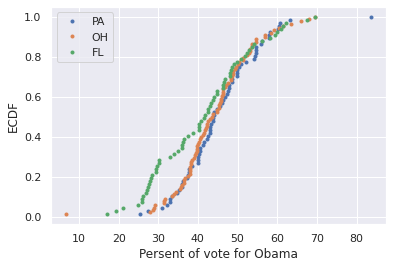

<Figure size 432x288 with 0 Axes>

In [18]:
# Plotting ECDFs of tree swing state respectively

x_pa, y_pa = ecdf(dem_share[swing_states['state']=='PA'])
x_oh, y_oh = ecdf(dem_share[swing_states['state']=='OH'])
x_fl, y_fl = ecdf(dem_share[swing_states['state']=='FL'])

_ = plt.plot(x_pa, y_pa, marker='.', linestyle='none')
_ = plt.plot(x_oh, y_oh, marker='.', linestyle='none')
_ = plt.plot(x_fl, y_fl, marker='.', linestyle='none')
_ = plt.xlabel('Persent of vote for Obama')
_ = plt.ylabel('ECDF')
_ = plt.legend(('PA', 'OH', 'FL'), loc='best')
plt.show()
plt.clf()

# Quantitative exploratory data analysis

In [19]:
# The mean of percentage of vote for Obama

np_mean_dem_share = np.mean(dem_share)
np_mean_dem_share

43.76441441441444

The mean is influenced by the outlier, but the median is immune to data that take on extreme values

In [20]:
# The median of percentage of vote for Obama

median_dem_share = np.median(dem_share)
median_dem_share

43.185

In [21]:
# The percentile of percentage of vote for Obama

per_dem_share = np.percentile(dem_share, [25, 50, 75])
per_dem_share

array([37.3025, 43.185 , 49.925 ])

plotting untuk penarikan kesimpulan statistik berdasarkan presentil dengan menampilkan fitur yang menonjol pada dataset salah satunya dengan menggunakan Boxplot. Dan boxplot juga salah satu alternatif dari soluri kekurangan Bee swarm plot selain ECDF

In [22]:
# Shows the deficiencies of the Bee swarm plot
# import data all states

all_state = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/2008_all_states.csv')
all_state.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


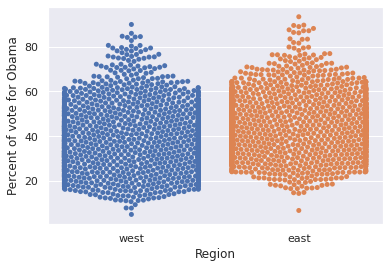

<Figure size 432x288 with 0 Axes>

In [23]:
# See how bad it is when using the bee swam plot

_ = sns.swarmplot(x='east_west', y='dem_share', data=all_state)
_ = plt.xlabel('Region')
_ = plt.ylabel('Percent of vote for Obama')
plt.show()
plt.clf()

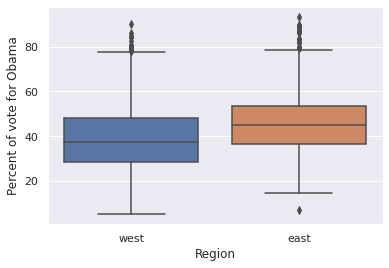

<Figure size 432x288 with 0 Axes>

In [24]:
# Subsetting dems_share and east_west features and assign it to boxplot

_ = sns.boxplot(x='east_west', y='dem_share', data=all_state)
_ = plt.xlabel('Region')
_ = plt.ylabel('Percent of vote for Obama')
plt.show()
plt.clf()

The total height of the box contains the middle 50% of the data, is called the interquartile range / IQR

The median and the 50th percentile of data are same value.

The whiskers extend a distance of 1-point-5 times the IQR, or to the extent of the data, whichever is more extreme.

Finally, any points outside of the whiskers are plotted

In [25]:
# separates the percent of vote for Obama from the west and the east

dem_share_west = all_state['dem_share'][all_state['east_west']=='west']
dem_share_east = all_state['dem_share'][all_state['east_west']=='east']

In [26]:
# percentile from west

per_west = np.percentile(dem_share_west, [25, 50, 75])
print(per_west)

# percentile from east

per_east = np.percentile(dem_share_east, [25, 50, 75])
print(per_east)

[28.2625 37.425  48.1825]
[36.41  44.86  53.355]


---
variance and standard deviation

In [27]:
# the variance from petal length of versicolor

variance_ver_petal_length = np.var(ver_petal_length)
variance_ver_petal_length

0.21640000000000012

adjust the unit of variance with the unit average, using std or square the variance

In [28]:
# the std 

std1_ver_petal_length = np.sqrt(variance_ver_petal_length)
std2_ver_petal_length = np.std(ver_petal_length)

print(std1_ver_petal_length, std2_ver_petal_length)

0.4651881339845204 0.4651881339845204


---
berbeda dengan Variance yang satu dimensi, Covariance lebih dari satu dimensi. dan untuk mengatasi masalah unit satuan yang berbeda menggunakan Pearson correlation coefficient.

cov(x, y) > 0, the covariance is positive or positively correlated.

cov(x, y) < 0, the covariance is negative or negatively correlated/anticorrelated

In [29]:
# covariance antar fitur total votes dan percent of vote for Obama

cov_dem_share_and_total_votes = np.cov(dem_share,  swing_states['total_votes'])

# covariance matrix

print(cov_dem_share_and_total_votes, '\n')

# covariance 

print(cov_dem_share_and_total_votes[0, 1])

[[1.14763447e+02 8.17309362e+05]
 [8.17309362e+05 2.02451039e+10]] 

817309.3618405284


In [31]:
# pearson correlation coefficient dari total votes dan firur percent of vote for Obama

pear_corr_coef = np.corrcoef(dem_share, swing_states['total_votes'])

# corrcoef matrix

print(pear_corr_coef, '\n')

# corrcoef

print(pear_corr_coef[0, 1])

[[1.         0.53619736]
 [0.53619736 1.        ]] 

0.536197364958678


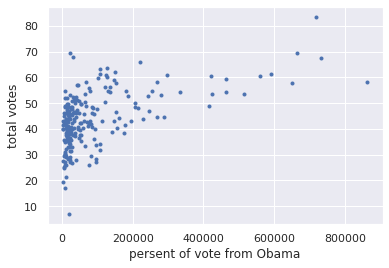

<Figure size 432x288 with 0 Axes>

In [32]:
_ = plt.plot(swing_states['total_votes'], dem_share, marker='.', linestyle='none')
_ = plt.xlabel('persent of vote from Obama')
_ = plt.ylabel('total votes')
plt.show()
plt.clf()

dari scatter plot diatas, bisa dilihat kalau dua fitur berkorelasi positif

---
contoh lain plot dari dataset iris pada species versicolor

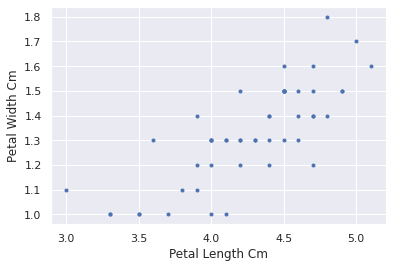

<Figure size 432x288 with 0 Axes>

In [33]:
# fitur length dan widhth dari petal
_ = plt.plot(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], marker='.', linestyle='none')
_ = plt.xlabel('Petal Length Cm')
_ = plt.ylabel('Petal Width Cm')
plt.show()
plt.clf()

dari figure diatas juga dua fitur berkorelasi positif


# Thinking probabilistically - Discrete variables

**Probability distribution** ~ a mathematical description of outcomes

**Probability mass function (PMF)** ~ The set of probabilities of discrete outcomes

In [34]:
# simulating 4 coin flips

np.random.seed(42)              # generate the same value

n_all_heads = 0                 # the number of head
for i in range(10000):          # the number of trials
  head = np.random.random(size=4) < 0.5
  if np.sum(head) == 4:
    n_all_heads += 1

n_all_heads / 10000

0.0618

In [35]:
# bernoulli trials

def perform_bernoulli_trials(n, p):
  '''Perform n bernoulli trials with probability success p
  and return number of successes'''

  n_success = 0
  for i in range(n):
    random_number = np.random.random()
    if random_number < p:
      n_success += 1
  return n_success

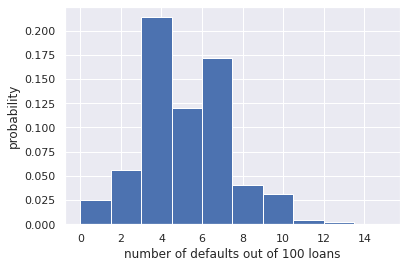

<Figure size 432x288 with 0 Axes>

In [36]:
# Menghitung gagal bayar pinjaman dari 100 penerima

# seed random number generator
np.random.seed(42)

# initialize the number of default
n_default = np.empty(10000)

# conpute the number of default
for i in range(10000):
  n_default[i] = perform_bernoulli_trials(100, 0.05)

# plot in histogram
sns.set()
_ = plt.hist(n_default, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')
plt.show()
plt.clf()

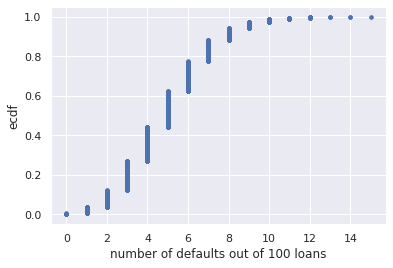

<Figure size 432x288 with 0 Axes>

In [37]:
# tampilkan dalam ecdf

x_default, y_default = ecdf(n_default)
_ = plt.plot(x_default, y_default, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('ecdf')
plt.show()
plt.clf()

In [38]:
# misalkan bank akan kehilangan uang jika jumlah gagal bayar lebih atau sama dari 10 orang pada simulasi, maka porbabilitasnya

lose_money = np.sum(n_default >= 10)
print('Probability of losing money, is ' + str(lose_money / len(n_default)))

Probability of losing money, is 0.0263


---
**Binomial distribution**

The number r of successes in n bernoulli trials with probability p of success

In [39]:
# ex: the number r of heads in 4 coin flips with probability 0.5 of heads

np.random.seed(42)
r = np.random.binomial(4, 0.5)
print(r, '\n')

# r with bernoulli trial function
r = perform_bernoulli_trials(4, 0.5)
print(r, '\n')

# dengan pengamatan 10 kali / the Binomial PMF(Probability Mass Function)
r = np.random.binomial(2, 0.5, size=10)
print(r)

2 

1 

[0 0 2 1 1 0 2 2 0 0]


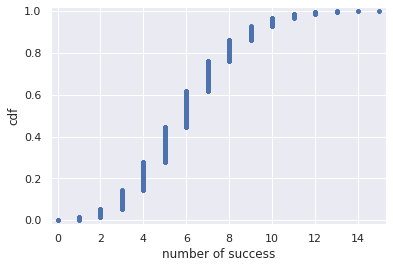

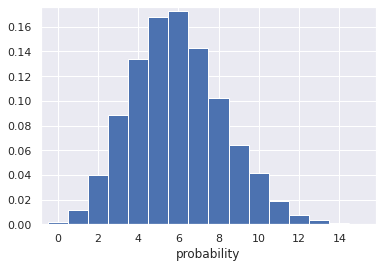

<Figure size 432x288 with 0 Axes>

In [40]:
# contoh lain dan visualisasikan pmf nya dengan cdf

np.random.seed(42)
samples = np.random.binomial(60, 0.1, size=10000)
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('number of success')
_ = plt.ylabel('cdf')
plt.show()
plt.clf()

# plot the PMF of the Binomial distribution as a histogram

# hitung bins edges, karena n_default misalnya 0, 1, 2, and so on
bins = np.arange(0, max(samples)+1.5) - 0.5

_ = plt.hist(samples, bins=bins, density=True)
plt.margins(0.02)
_ = plt.xlabel('number of success')
_ = plt.xlabel('probability')
plt.show()
plt.clf()

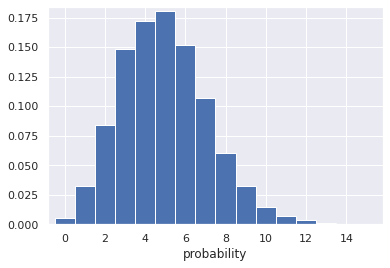

<Figure size 432x288 with 0 Axes>

In [41]:
# plot the PMF of the Binomial distribution as a histogram
# data sample dari jumlah gagal bayar as n_default

# hitung bins edges, karena n_default misalnya 0, 1, 2, and so on
bins = np.arange(0, max(n_default)+1.5) - 0.5

_ = plt.hist(n_default, bins=bins, density=True)
plt.margins(0.02)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.xlabel('probability')
plt.show()
plt.clf()

---
**Poisson process**

The timing of the next event is completely independent of when the previous event happened


**Poisson distribution**

The number r of arrivals of a Poisson process in a given time interval with average rate of? arrivals per interval is Poisson distributed

ex. The number r of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed

also, Poisson distribution is limit of the Binomial distribution for **low** probability of succes(p), and **large** number of trials, that's for rare event

In [42]:
# Relationship between Binomial and Poisson distributions

np.random.seed(42)

samples_poisson = np.random.poisson(lam=10, size=10000)
print('Poisson', np.mean(samples_poisson),
                 np.std(samples_poisson))

n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

for i in range(3):
  samples_binomial = np.random.binomial(n=n[i], p=p[i], size=10000)
  print('n = ', n[i], np.mean(samples_binomial),
                      np.std(samples_binomial))

Poisson 10.0186 3.144813832327758
n =  20 9.9637 2.2163443572694206
n =  100 9.9947 3.0135812433050484
n =  1000 9.9985 3.139378561116833


dari mean dan standard deviasi dari binomial diatas bisa dilihat pada jumlah percobaan lebih besar dan kemngkinan sukses lebih kecil sangat mendekati dengan mean dan standard deviasi dari poisson distribution

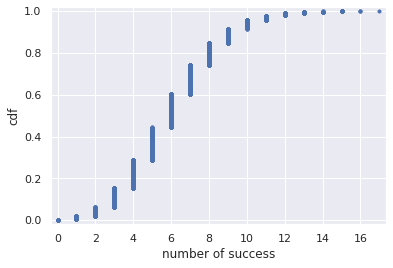

<Figure size 432x288 with 0 Axes>

In [43]:
# The Poisson CDF example

np.random.seed(42)
samples = np.random.poisson(lam=6, size=10000)
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('number of success')
_ = plt.ylabel('cdf')
plt.show()
plt.clf()

In [44]:
# ex. Draw 10,000 samples out of Poisson distribution

np.random.seed(42)
n_nohitters = np.random.poisson(lam=251/115, size=10000)

# Compute number of samples that are seven or greater
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more
p_large = n_large/10000

print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0067


# Thinking probabilistically - Continuous variables

**Continuous variables** ~ Quantities that can take any value, not just discrete values

**Probability densty function (PDF)** 
*   Continuous analog to the PMF
*   Mathematical description of the relative likelihood of observing a value of a continuous variable


**The normal distribution** ~ Describes a continuous variable whose PDF has a single
symmetric peak

In [45]:
# Draw 100000 samples from Normal distribution with stds of interest

np.random.seed(42)
samples_std1 = np.random.normal(loc=20, scale=1, size=100000)
samples_std3 = np.random.normal(loc=20, scale=3, size=100000)
samples_std10 = np.random.normal(loc=20, scale=10, size=100000)

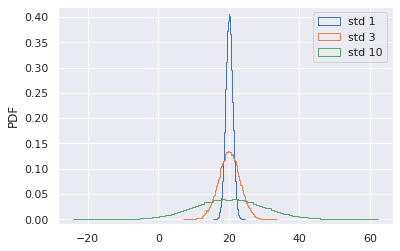

<Figure size 432x288 with 0 Axes>

In [46]:
# make histogram (the normal PDF)

_ = plt.hist(samples_std1, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')
_ = plt.legend(('std 1', 'std 3', 'std 10'), loc='best')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()
plt.clf()

kalau kita lihat pada samples dengan std 50 diatas, probability more than 50 standard deviation from the mean is very small. jadi, pas kita modeling data terdistribusi normal, outliers are extremely unlikely.

nah, pada dataset kebanyakan biasanya terdapat nilai extrem, jadi normal distribution mungkin tidak menjadi deskripsi yang bagus buat datanya

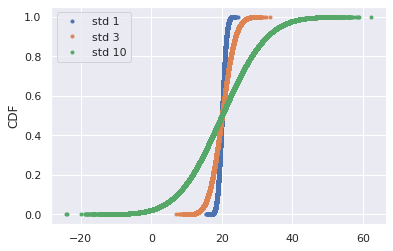

<Figure size 432x288 with 0 Axes>

In [47]:
# plot with CDF (the normal PDF)

x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')
_ = plt.legend(('std 1', 'std 3', 'std 10'), loc='best')
_ = plt.ylabel('CDF')
plt.show()
plt.clf()

The mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation

---
Dataset Belmont

Melihat data apakah terdistribusi normal atau tidak
dengan membandingkan **empirical** dan **theorical** CDF

In [48]:
belmont = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/belmont.csv')
belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


In [49]:
# convert datatime type 'MM:SS.MS' minutes ke seconds

# function

def m_to_s(data):
  total_minutes = np.empty(len(data))
  
  for i in range(len(data)):
    # split menit dan detik (colon)
    split_colon = data[i].split(':')

    # split detik dan milidetik (point)
    split_point = split_colon[1].split('.')
    
    # total minutes
    total_minutes[i] = round((int(split_colon[0])*60 + 
                             int(split_point[0])*1 +
                             int(split_point[1])/60),
                             1)
  return total_minutes

# convert by call function dan tambahkan pada pandas dataset belmont

belmont['Time in minute'] = m_to_s(belmont['Time'])

In [50]:
belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles,Time in minute
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5,148.8
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5,147.1
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5,148.9
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5,151.2
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5,150.7


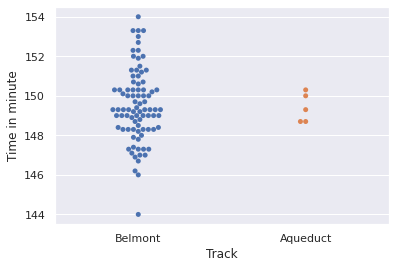

In [51]:
# cek outlier

_ = sns.swarmplot(x='Track', y='Time in minute', data=belmont)
plt.show()

terdapat dua outlier pada time winning belmont yakni 144 dan 154

In [52]:
# belmont time no outlier

belmont_times_no_outlier = list(belmont['Time in minute'])
belmont_times_no_outlier.remove(144)
belmont_times_no_outlier.remove(154)
len(belmont_times_no_outlier)

89

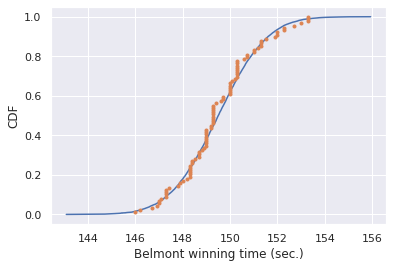

<Figure size 432x288 with 0 Axes>

In [53]:
# bandingkan theorical dan empirical

# theorical normal sampling
mu = np.mean(belmont_times_no_outlier)
sigma = np.std(belmont_times_no_outlier)
np.random.seed(42)
samples_of_belmontsTimes = np.random.normal(loc=mu, scale=sigma, size=10000)

x_theor, y_theor = ecdf(samples_of_belmontsTimes)

# empirical
x_emp, y_emp = ecdf(belmont_times_no_outlier)

# plot CDFs
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_emp, y_emp, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()
plt.clf()

In [54]:
# peluang horse menyamai atau melebihi rekor dari Secretariat (144 sec.)

np.random.seed(42)
samples = np.random.normal(mu, sigma, size=100000)

probabilities = len(samples[samples <= 144]) / 100000
print(probabilities)

0.00035


ya, 0.035 % kemungkinan kuda nantinya akan meyamai atau melampaui rekor dari Secretariat

---

**The exponential distribution** ~ The waiting time beetween arrivals of a Poisson process